<a href="https://colab.research.google.com/github/luszczewskakasia/robot/blob/main/robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

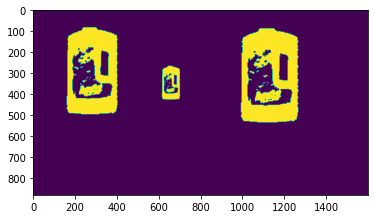

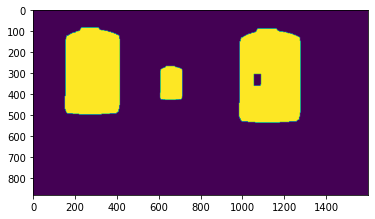

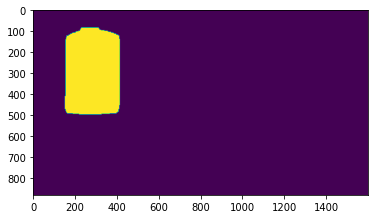

[102942]
102942


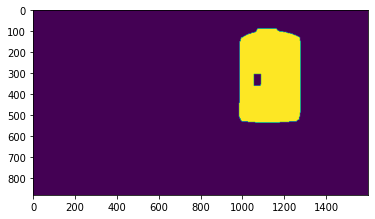

[102942, 122675]
122675


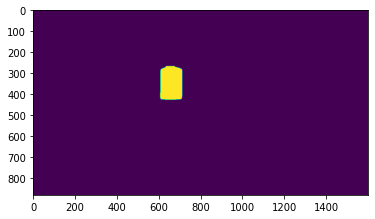

[102942, 122675, 16234]
122675


In [17]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import copy
import random
import matplotlib.image as mpimg

andy = cv2.imread("Bez tytuÅ‚u.png",cv2.IMREAD_COLOR)

#detecting green color only, so it's possible, to detect the colour of the bottle
hsv = cv2.cvtColor(andy, cv2.COLOR_BGR2HSV)
lower_bound = np.array([50, 20, 20])	 
upper_bound = np.array([100, 255, 255])

mask = cv2.inRange(hsv, lower_bound, upper_bound)
ret,thr = cv2.threshold(mask,0,255,cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
plt.imshow(mask)
plt.show()

#using morphology transformation allows to fill empty pixels (pixels, which weren't detected as green or were diiferent colours on the bottle)
close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((50,50)))
improved=cv2.dilate(close,np.ones((1,21)))
buff = improved
plt.imshow(improved)
plt.show()

#in this part of code allows to separate the bottles as separate elements
def segmentation(img, coord, l):
  img = img.astype(np.int16)
  segmented = np.zeros(img.shape)
  segmented[coord[0]][coord[1]] = 255 #marked white pixel
  dilate = cv2.dilate(segmented, np.ones((30,30)))

  for i in range(40):
    dilate = cv2.dilate(dilate, np.ones((30,30)))
    super_threshold_indices = dilate > img
    dilate[super_threshold_indices] = 0
  
  return dilate



#in this part of code segmentation function is used. It allows to take average coordinates of see=lected white pixels (so these from one bottle).
#Thanks to that, the camera will detect the biggest bottle and the go in its direction
tab = []
while not len(np.where(buff == [255])[0]) == 0:
  find_pixel = np.where(buff == [255])
  segmented = segmentation(buff, (find_pixel[0][0], find_pixel[1][0]), 10)
  position = np.where(segmented == [255])
  #here should be implemented the code, which forces robot to i.e. goes more to the right in case our coordinates are on the left of the robot and so on.
  #when it stops seeing the bottle, then it has to turn and look for next bottle
  x = np.average(position[0])
  y = np.average(position[1])
  buff = buff - segmented
  plt.imshow(segmented)
  plt.show()
  white_pix2 = cv2.countNonZero(segmented)
  tab.append(white_pix2)
  print(tab)
  print(np.max(tab))